<a href="https://colab.research.google.com/github/Josey1/Prediction-of-Product-Sales/blob/main/sales_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1 - Part 2 (Core):
#Loading Data


In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
fpath= "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#Data Cleaning

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# Use .select_dtypes to view only object columns
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [8]:
#Identifying duplicate rows
duplicated_rows = df.duplicated()
duplicated_rows

# Get the sum of duplicated_rows filter to see the number of duplicate rows
df.duplicated().sum()

0

In [ ]:
#Getting missing values
null_counts = df.isnull().sum()

In [ ]:
print(null_counts)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [ ]:
# percentage of null values for each column.
total_columns = len(df.columns)

null_percentage_per_row = (df.isnull().sum(axis=1) / total_columns) * 100

# Display the percentage of null values per row
print(null_percentage_per_row)


0       0.000000
1       0.000000
2       0.000000
3       8.333333
4       0.000000
          ...   
8518    0.000000
8519    8.333333
8520    0.000000
8521    0.000000
8522    0.000000
Length: 8523, dtype: float64


In [ ]:
#Looking closely at the two columns with nulls
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [9]:
#Replacing the missing item identifiers with MISSING
df['Item_Identifier'] = df['Item_Identifier'].fillna("MISSING")

In [ ]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [10]:
#looking at Outlet_Size
df['Outlet_Size'].isna()

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [11]:
#Replace missing Out_Let missing values with missing
df['Outlet_Size'] = df['Outlet_Size'].fillna("MISSING")

In [12]:
df['Outlet_Size'].isna().sum()

0

In [13]:
#Checking for inconsistencies in categorical columns
df[cat_cols].value_counts()

Item_Identifier  Item_Fat_Content  Item_Type              Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type      
DRA12            LF                Soft Drinks            OUT035             Small        Tier 2                Supermarket Type1    1
FDV28            Regular           Frozen Foods           OUT010             MISSING      Tier 3                Grocery Store        1
FDV32            Low Fat           Fruits and Vegetables  OUT035             Small        Tier 2                Supermarket Type1    1
                                                          OUT019             Small        Tier 1                Grocery Store        1
                                                          OUT018             Medium       Tier 3                Supermarket Type2    1
                                                                                                                                    ..
FDJ22            Low Fat           Snack Foods            OU

In [14]:
#Numeric columns
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
#summary statisitics for numeric values
summary_stats = df[num_cols].describe()
print(summary_stats)

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


#Project 1 - Part 3 (Core):

In [16]:
#Save the cleaned DataFrame to my deive
fpath_out = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week03/Data/cleaned_sales_prediction.csv"

# Use to_csv to save the dataframe using the filename
df.to_csv(fpath_out, index=True)

In [17]:
# Read in your new .csv file with Pandas.
df_cleaned = pd.read_csv(fpath_out)





In [18]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8523 non-null   int64  
 1   Item_Identifier            8523 non-null   object 
 2   Item_Weight                7060 non-null   float64
 3   Item_Fat_Content           8523 non-null   object 
 4   Item_Visibility            8523 non-null   float64
 5   Item_Type                  8523 non-null   object 
 6   Item_MRP                   8523 non-null   float64
 7   Outlet_Identifier          8523 non-null   object 
 8   Outlet_Establishment_Year  8523 non-null   int64  
 9   Outlet_Size                8523 non-null   object 
 10  Outlet_Location_Type       8523 non-null   object 
 11  Outlet_Type                8523 non-null   object 
 12  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage:

In [19]:
df_cleaned.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [20]:
# Drop the Unnamed: 0 column

df_cleaned = df_cleaned.drop(columns=['Unnamed: 0'])
# Display the .head to confirm the change
df_cleaned.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
#importing all the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Histogram showing distribution of weight

Text(0, 0.5, 'Count')

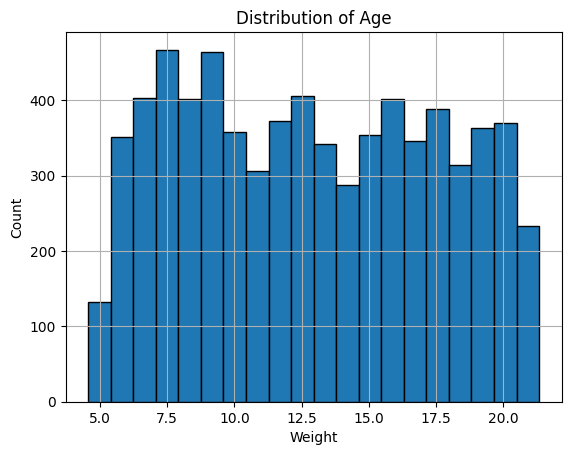

In [22]:
#Histogram showing distribution of weight
ax = df_cleaned['Item_Weight'].hist(bins = 'auto', edgecolor = 'black')
ax.tick_params(axis='x')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Age')
ax.set_xlabel('Weight')
ax.set_ylabel('Count')

Histogram showing distribution of  Item_Outlet_Sales


Text(0, 0.5, 'Count')

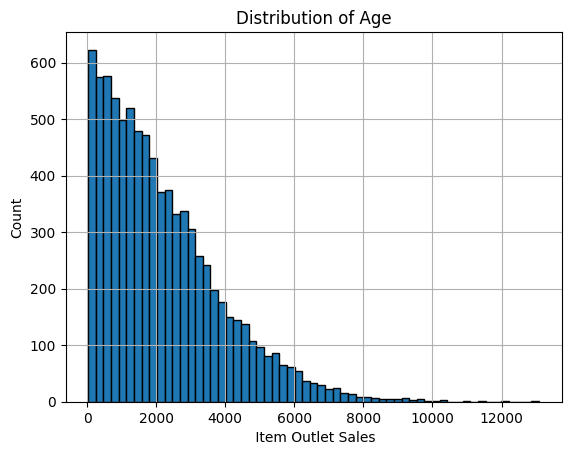

In [23]:
#Histogram showing distribution of weight
ax = df_cleaned['Item_Outlet_Sales'].hist(bins = 'auto', edgecolor = 'black')
ax.tick_params(axis='x')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Age')
ax.set_xlabel(' Item Outlet Sales')
ax.set_ylabel('Count')

Box plots for the numerical columns

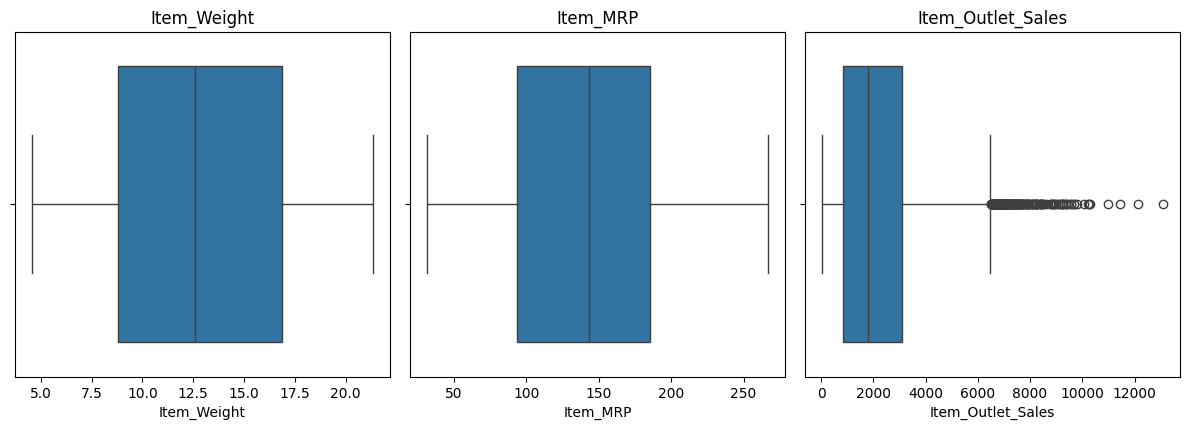

In [24]:
numerical_columns = ['Item_Weight','Item_MRP','Item_Outlet_Sales']

# Drawing box plots for each numerical variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_cleaned[column])
    plt.title(column)
plt.tight_layout()
plt.show()

Count Plots to see frequency for some oof the Categorical feature

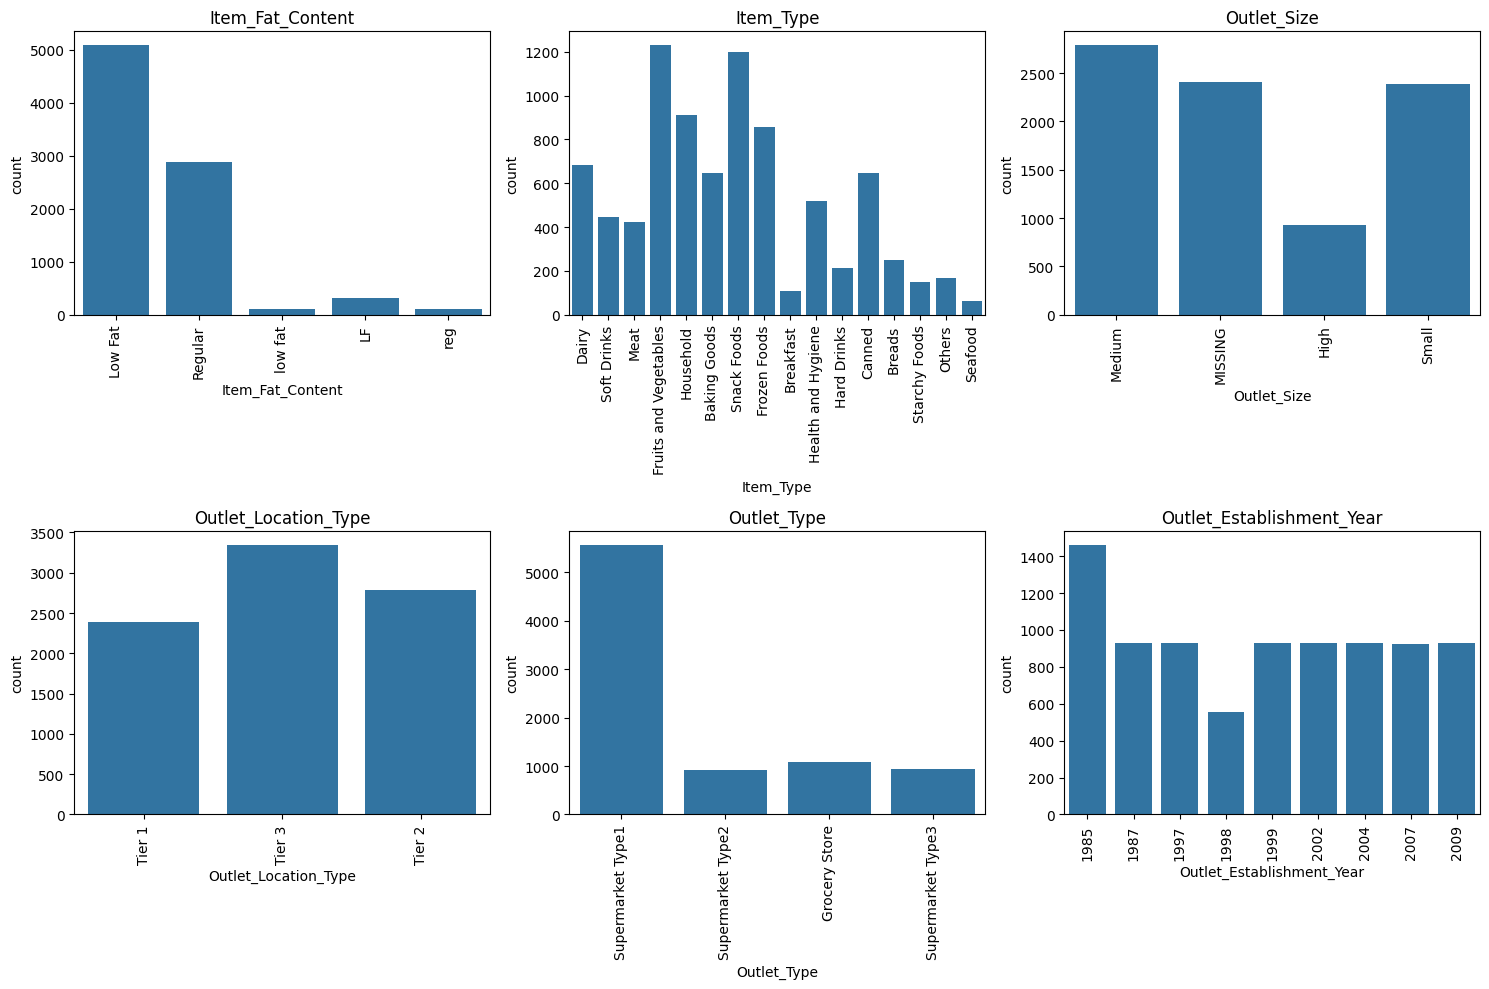

In [25]:
# Select categorical columns for count plots
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type','Outlet_Establishment_Year']

# ploting count plots for each categorical variable
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df_cleaned[column])
    plt.title(column)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Heatmap

In [26]:
# Find correlations
# Get correlations
corr = df_cleaned.corr(numeric_only = True)
corr.round(2)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.03,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.03,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


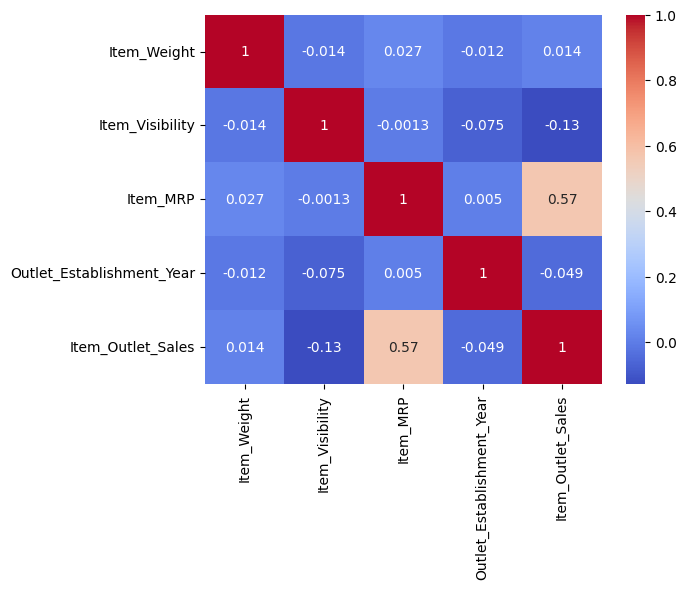

In [ ]:
# Make a heatmap using the correlations from above
sns.heatmap(corr, cmap = 'coolwarm', annot = True);


#Project 1: part 4 Core

Remove the placeholders you added in week 2 and replace them with null values.
_The affected columns are Item_Weight and Outlet_Size

Outlet_Size column

In [33]:
#Replace MISSING with null Nan for ML
df_cleaned['Outlet_Size'] = df['Outlet_Size'].replace('MISSING', np.nan)
# Check value counts
df_cleaned['Outlet_Size'].value_counts(dropna=False)


Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

#Outlet size
What type of feature is it? Categorical
How many null values?2410
What percentage? 28.28%
What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) It would be a big size to drop. I would replace them with the mode, the size that appears many times.
Is the feature constant or quasi-constant? It is a constant feature
What is the cardinality? Is it high (>10)? It is low
Would we know this feature before the target is determined? Yes
Is there a business case/understanding reason to exclude based on our business case?No

In [36]:
df_cleaned['Item_Weight'].value_counts(dropna=False)

NaN       1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 416, dtype: int64

#Weight
What type of feature is it?  numeric
How many null values?1463
What percentage?17.17%%
 What would you do with the null values (drop the rows? imppute with median
Is the feature constant or quasi-constant?
What is the cardinality? Is it high (>10)? high
Would we know this feature before the target is determined? no
Is there a business case/understanding reason to exclude based on our business case?  no

In [37]:
#Percentage of nulls in the columns above
# Specify the columns for which you want to find the percentage of null values
columns_to_check = ['Item_Weight', 'Outlet_Size']

for column_name in columns_to_check:
    # Calculate the total number of null values in the specified column
    null_count = df_cleaned[column_name].isnull().sum()

    # Calculate the total number of values in the specified column
    total_count = len(df_cleaned[column_name])

    # Calculate the percentage of null values
    percentage_null = (null_count / total_count) * 100

    # Display the result
    print("Percentage of null values in column '{}': {:.2f}%".format(column_name, percentage_null))

Percentage of null values in column 'Item_Weight': 17.17%
Percentage of null values in column 'Outlet_Size': 28.28%


#Create a univariate visualization showing the distribution of values/categories.

In [40]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

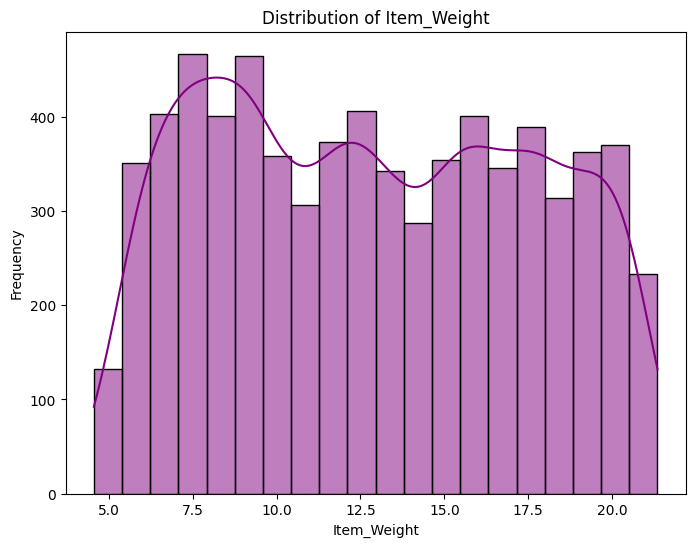

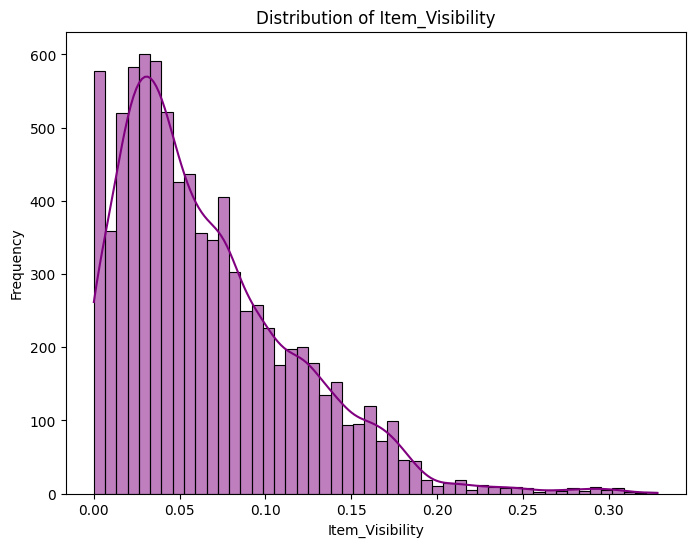

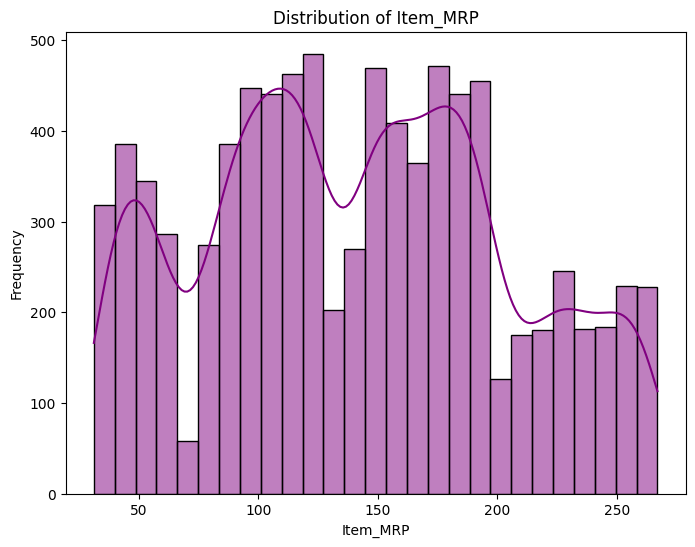

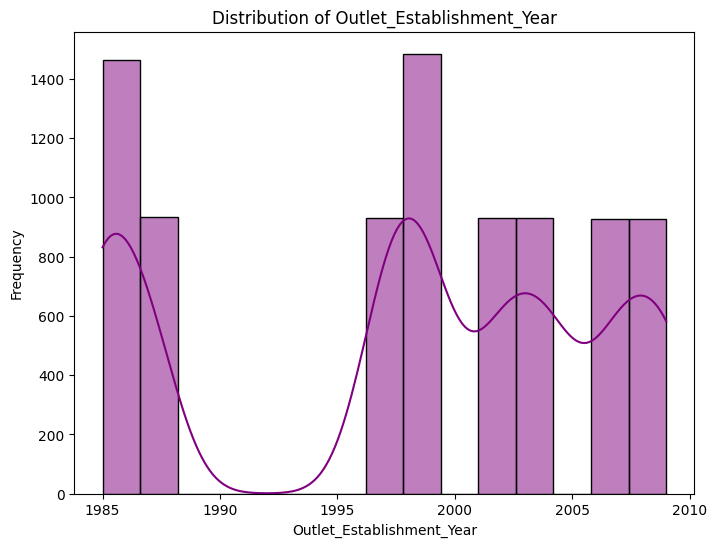

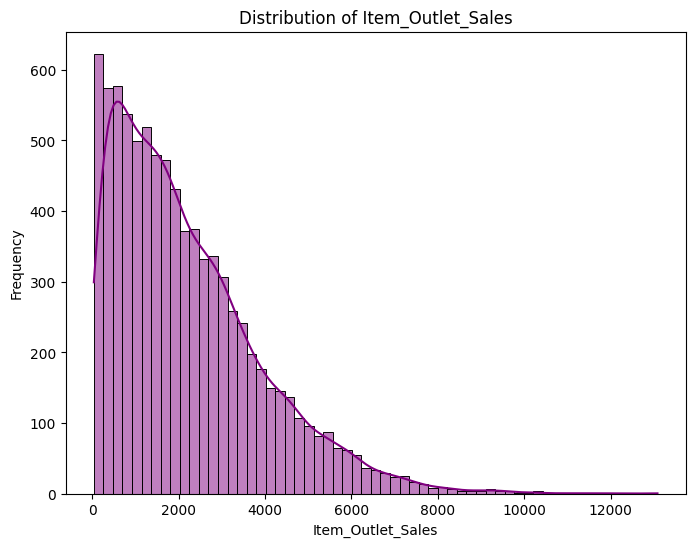

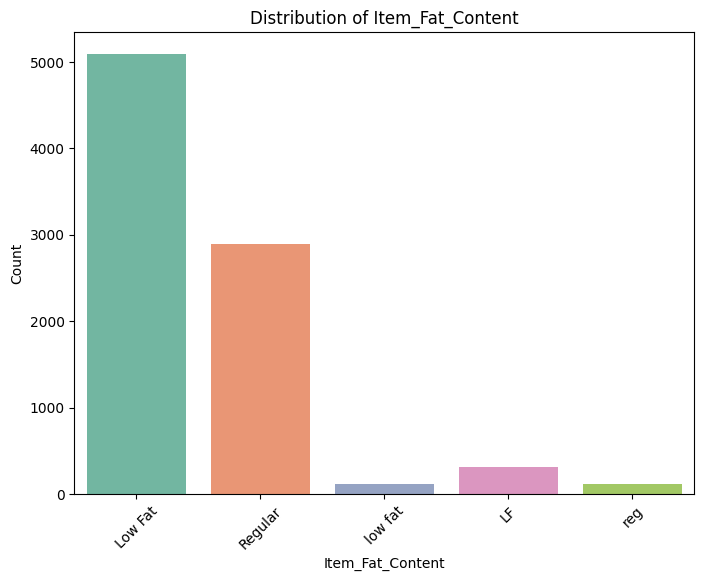

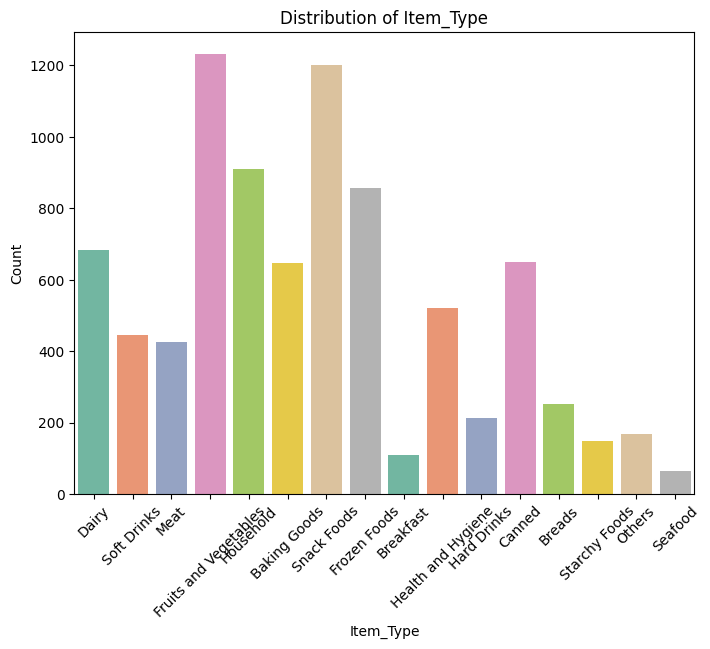

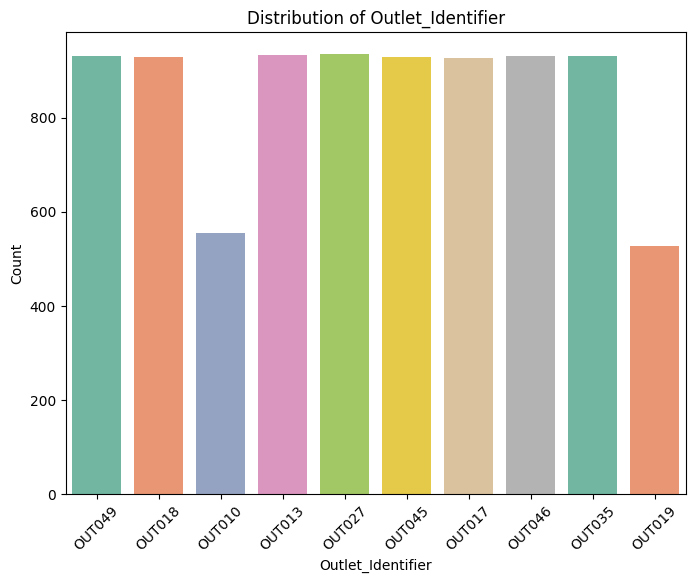

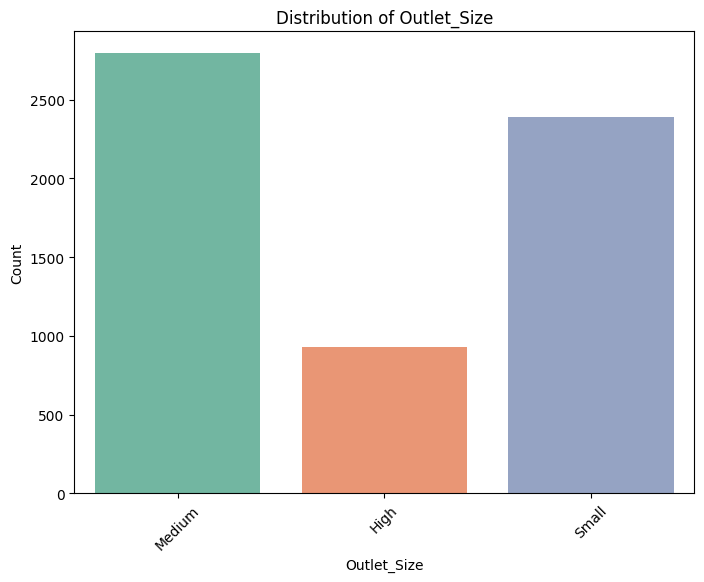

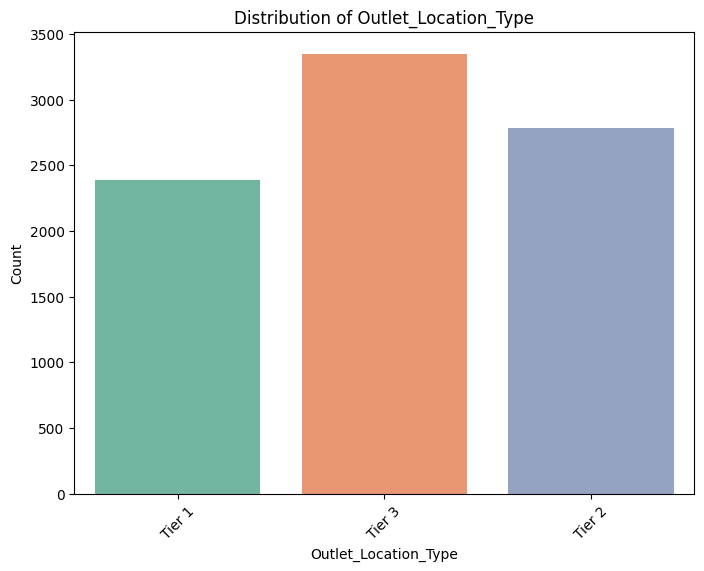

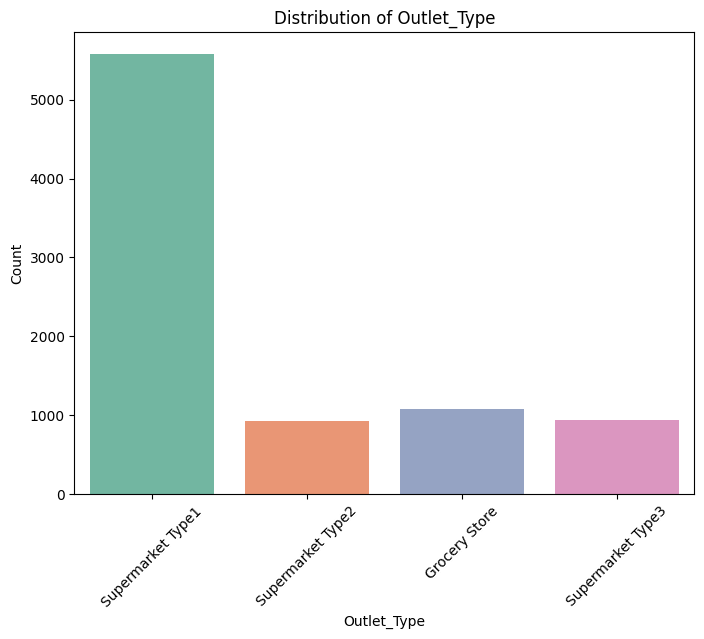

In [45]:
def visualize_univariate(df_cleaned):
    # Extract numerical and categorical columns excluding 'Unique_Identifier'
    numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
    categorical_columns = [col for col in categorical_columns if col != 'Item_Identifier']  # Exclude 'Item_identifier'

    # Plot distribution for numerical columns
    for column in numeric_columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(df_cleaned[column], kde=True, color='purple')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

    # Plot distribution for categorical columns
    for column in categorical_columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df_cleaned, x=column, hue=column, palette='Set2', legend=False)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()


visualize_univariate(df_cleaned)

Create a multivariate visualization plotting each feature vs. the target.

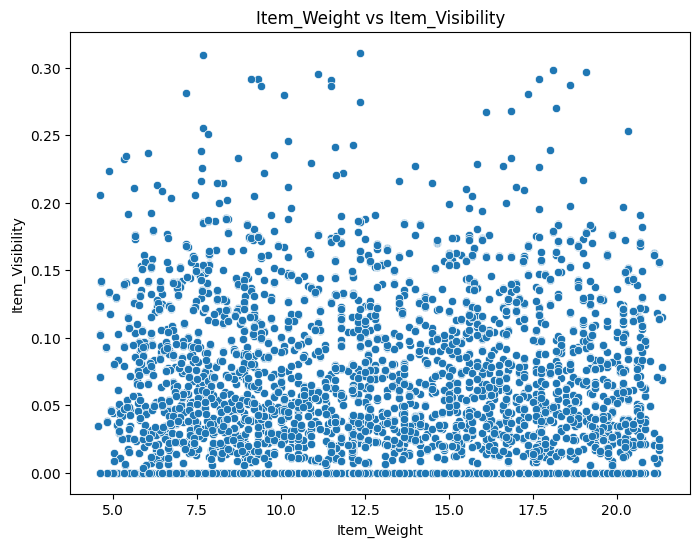

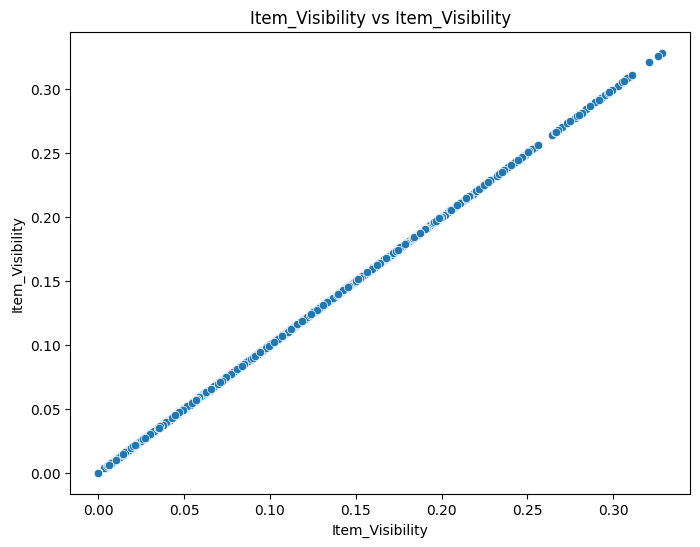

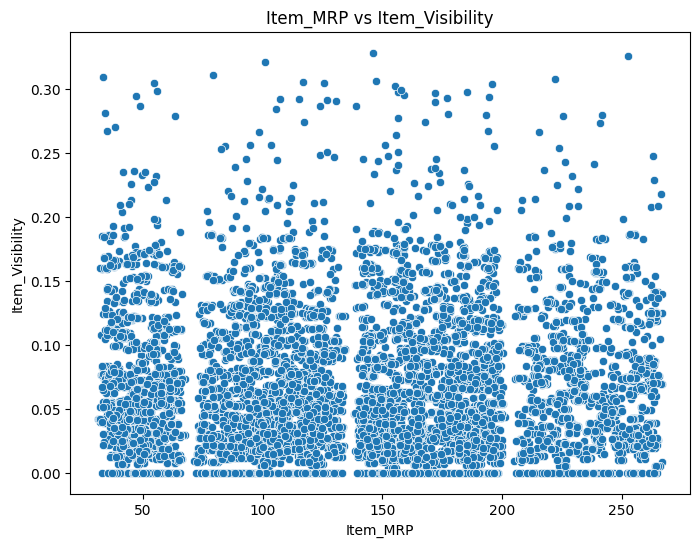

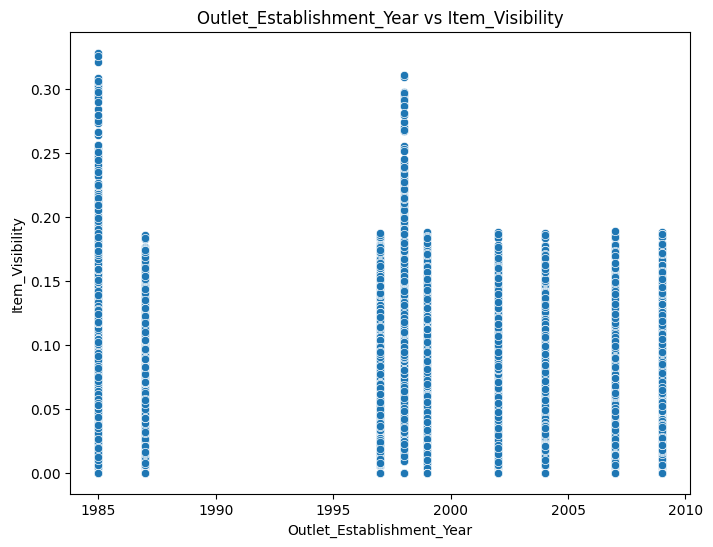

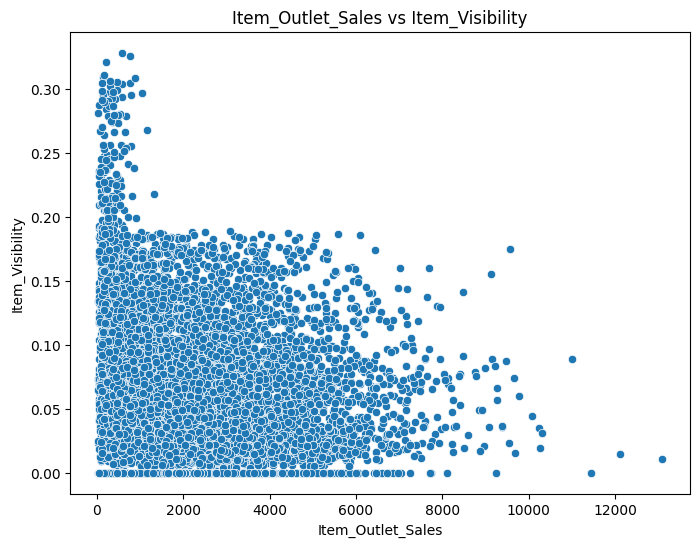

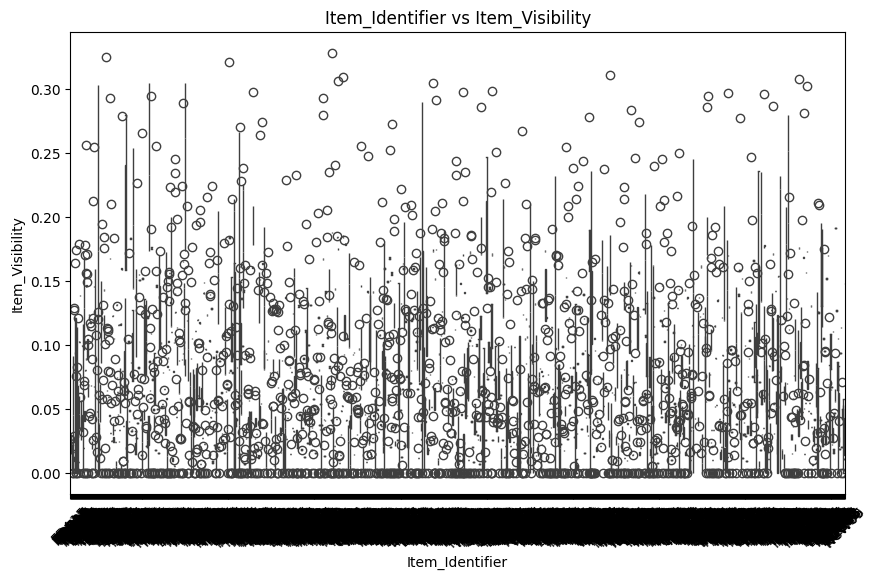

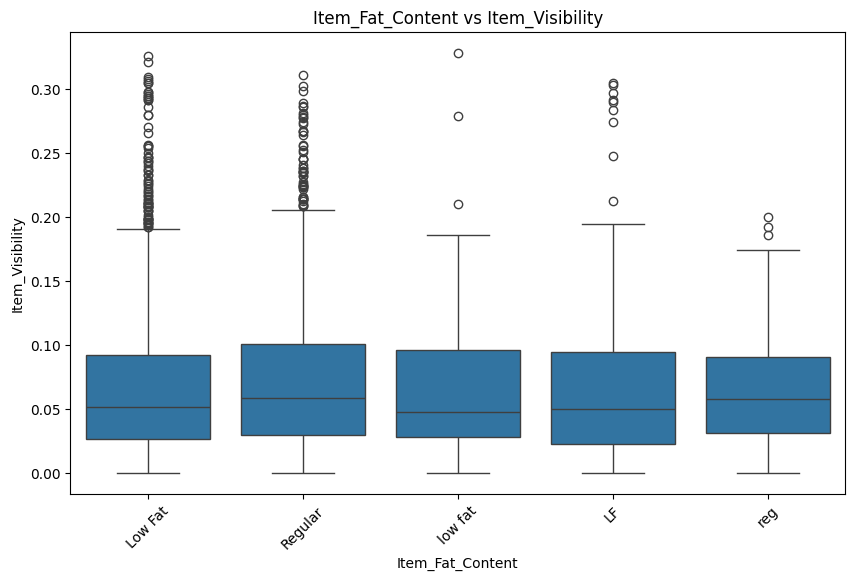

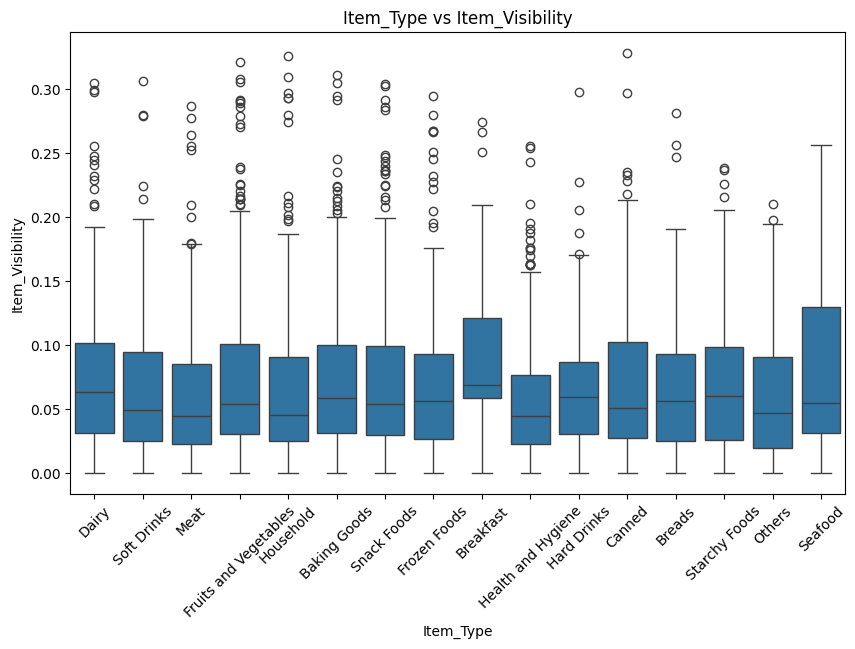

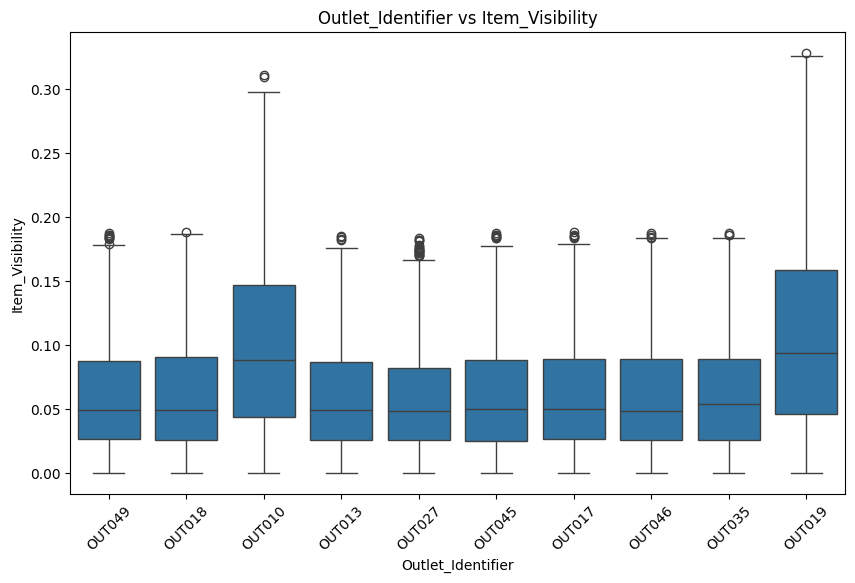

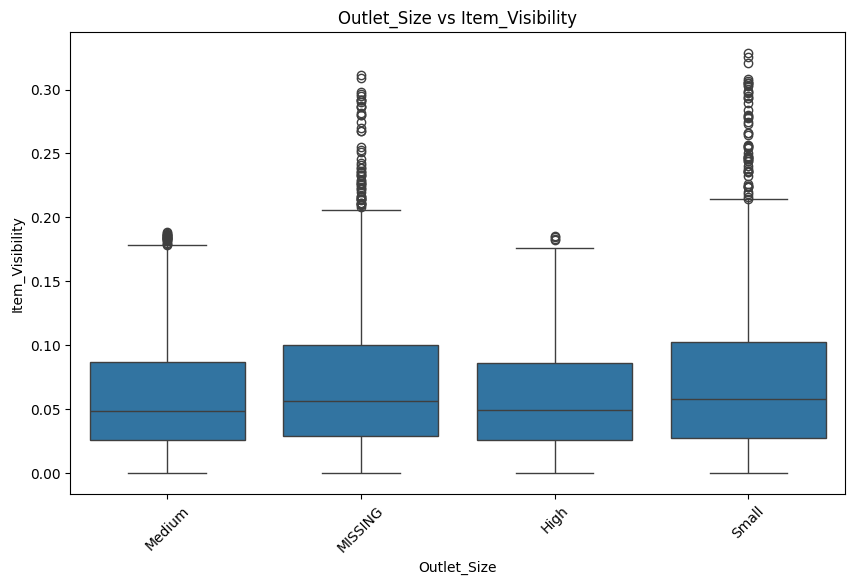

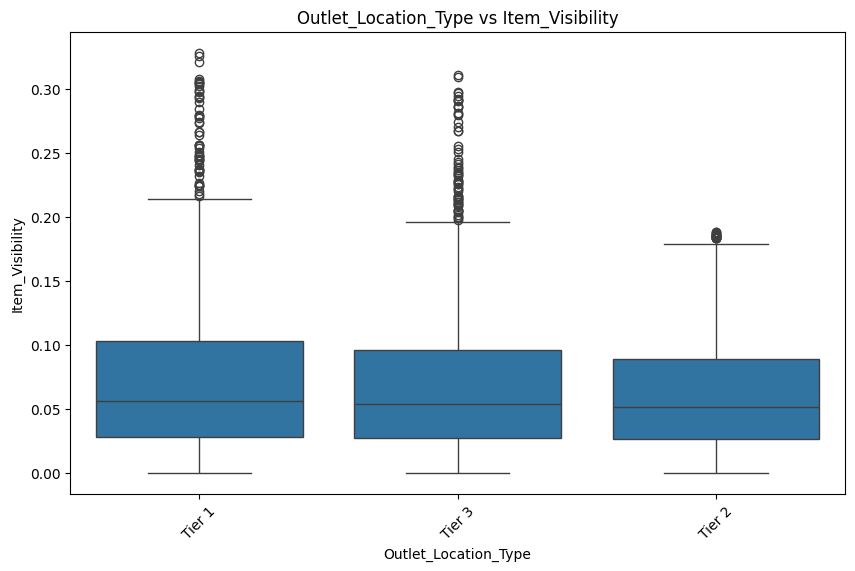

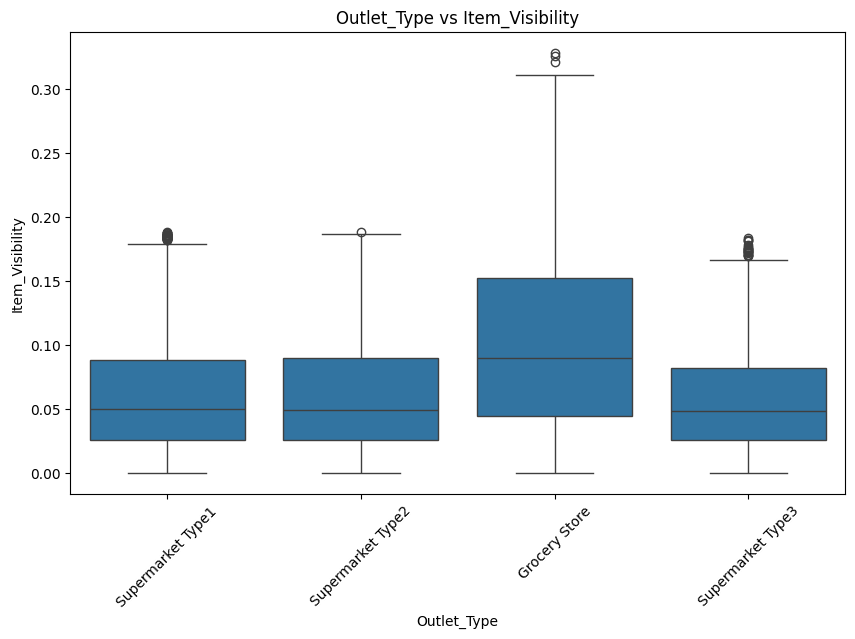

In [46]:
def visualize_multivariate(df_cleaned, target):
    # Separate numerical and categorical columns
    numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

    # Plot numerical features against the target
    for column in numeric_columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df_cleaned[column], y=df[target])
        plt.title(f'{column} vs {target}')
        plt.xlabel(column)
        plt.ylabel(target)
        plt.show()

    # Plot categorical features against the target
    for column in categorical_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[column], y=df_cleaned[target])
        plt.title(f'{column} vs {target}')
        plt.xlabel(column)
        plt.ylabel(target)
        plt.xticks(rotation=45)
        plt.show()

# Assuming df_cleaned is your DataFrame and 'target_variable' is your target variable
visualize_multivariate(df_cleaned, 'Item_Visibility')